### Brian Naughton
### Compare TMVN Gibbs sampler to `tmvtnorm` package in `R`

This notebook investigates the computational speed and results of the Gibbs sampler in the `TruncatedMVN.jl` package to be compared against a similar package in `R`.  

In [1]:
versioninfo()
srand(32787)

Julia Version 0.3.7
Commit cb9bcae* (2015-03-23 21:36 UTC)
Platform Info:
  System: Linux (x86_64-linux-gnu)
  CPU: Intel(R) Core(TM) i7-2670QM CPU @ 2.20GHz
  WORD_SIZE: 64
  BLAS: libopenblas (DYNAMIC_ARCH NO_AFFINITY Sandybridge)
  LAPACK: libopenblas
  LIBM: libopenlibm
  LLVM: libLLVM-3.3


#### Setup problem:

In [2]:
using Distributions, TruncatedMVN

μ = zeros(3)
Σ = [1.0   0.99 0.98;
     0.99  1.0  0.99 ;
     0.98  0.99 1.0 ]
c = [0.0, 0.0, -Inf]
d = [1.0, 2.0, Inf]
R̃ = [ 1.0 -2 0;
     -1  0 0;
      0  0 1];

#### Take 10,000 samples to evaluate later, and initialize JIT compiler

In [3]:
using StatsBase
samples = GibbsTMVN(μ, Σ, c, d, R̃, 10000)
acf_samples = autocor(samples', [0:40]);

#### Time 10,000 iterations:

In [4]:
@time GibbsTMVN(μ, Σ, c, d, R̃, 10000);

elapsed time: 0.019530629 seconds (6329888 bytes allocated)


#### Time 100,000 iterations:

In [5]:
@time GibbsTMVN(μ, Σ, c, d, R̃, 100000);

elapsed time: 0.203683083 seconds (63196088 bytes allocated, 16.09% gc time)


### Analyze results of Gibbs sampler
#### Do the trace plots show good mixing properties?

In [6]:
using Gadfly, DataFrames, Cairo
data = DataFrame(x=vec(1:10000), w1=vec(samples[1, :]), w2=vec(samples[2, :]), 
                  w3=vec(samples[3, :]))
plot1 = plot(x=data[:x], y=data[:w1], Geom.line, Guide.xlabel("Iteration"), Guide.ylabel("w₁"))
draw(PDF("traceplot2.pdf", 4inch, 3inch), plot1)

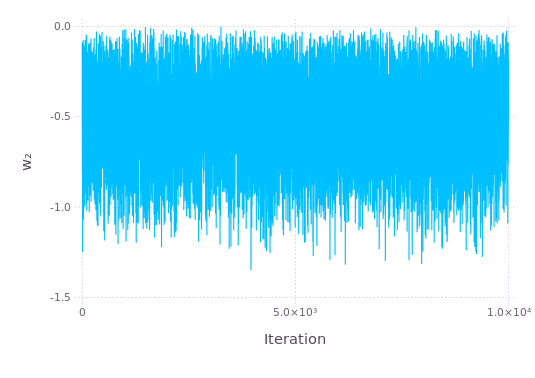

In [7]:
plot(x=data[:x], y=data[:w2], Geom.line, Guide.xlabel("Iteration"), Guide.ylabel("w₂"))

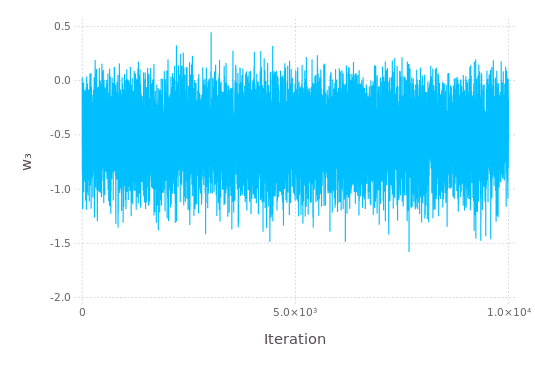

In [8]:
plot(x=data[:x], y=data[:w3], Geom.line, Guide.xlabel("Iteration"), Guide.ylabel("w₃"))

#### Plot the marginal densities of $w_i$ to compare against those from `R`

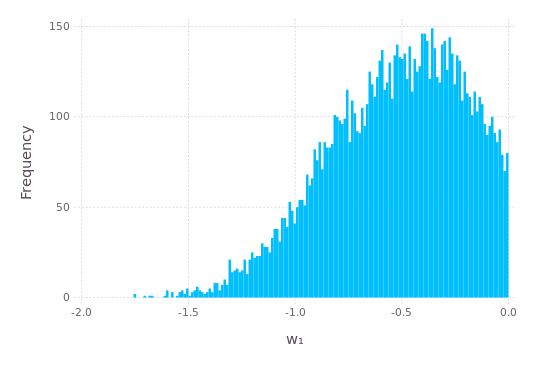

In [9]:
densityj1 = plot(x=data[:w1], Geom.histogram, Guide.ylabel("Frequency"), Guide.xlabel("w₁"))
draw(PDF("densityj1.pdf", 4inch, 3inch), densityj1)
densityj1

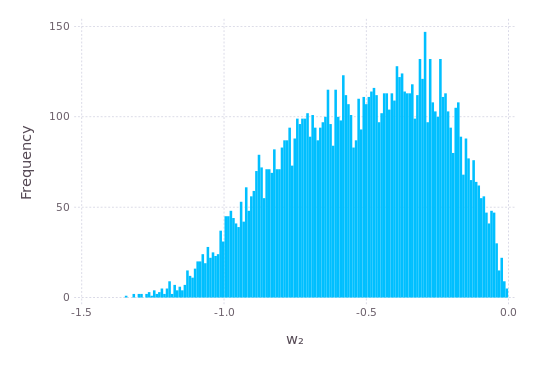

In [10]:
plot(x=data[:w2], Geom.histogram, Guide.ylabel("Frequency"), Guide.xlabel("w₂"))

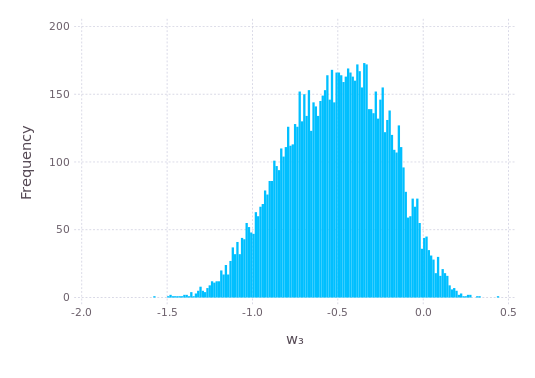

In [11]:
plot(x=data[:w3], Geom.histogram, Guide.ylabel("Frequency"), Guide.xlabel("w₃"))

#### Plot the autocorrelations of $w_i$:

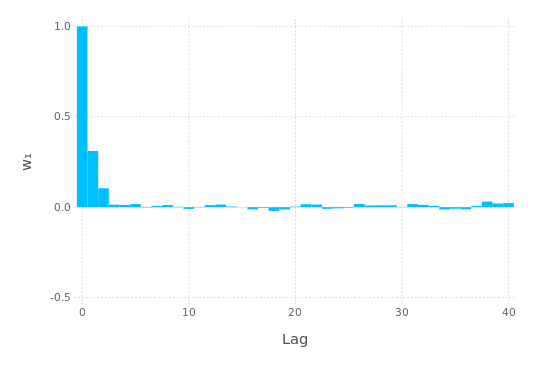

In [12]:
data_acf = DataFrame(lag=vec(0:40), acf1=acf_samples[:,1], acf2=acf_samples[:,2], acf3=acf_samples[:,3])
acfj1 = plot(x=data_acf[:lag], y=data_acf[:acf1], Geom.bar, Guide.xlabel("Lag"), Guide.ylabel("w₁"))
draw(PDF("acfj1.pdf", 4inch, 3inch), acfj1)
acfj1

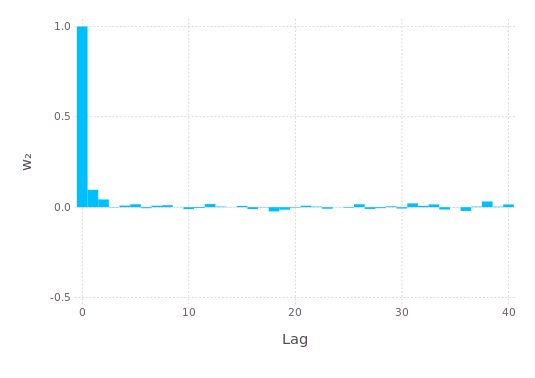

In [13]:
plot(x=data_acf[:lag], y=data_acf[:acf2], Geom.bar, Guide.xlabel("Lag"), Guide.ylabel("w₂"))

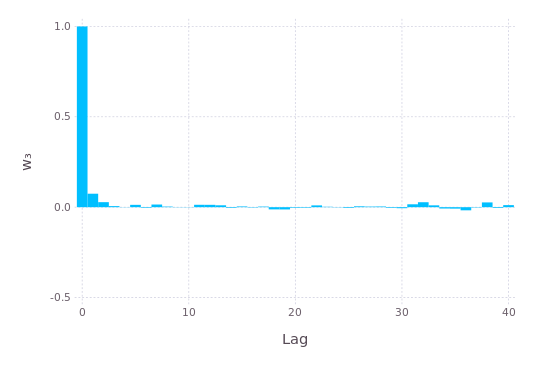

In [14]:
plot(x=data_acf[:lag], y=data_acf[:acf3], Geom.bar, Guide.xlabel("Lag"), Guide.ylabel("w₃"))